In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

import graphviz
from sklearn import tree

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# **1. Loading Dataset**

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/India_Delhi.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2399, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
1,2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2,2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
3,2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
4,2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2023-10-01


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2399 non-null   object 
 1   co            2399 non-null   float64
 2   no2           2399 non-null   float64
 3   o3            2399 non-null   float64
 4   pm10          2398 non-null   float64
 5   pm25          2398 non-null   float64
 6   so2           2399 non-null   float64
 7   humidity      1698 non-null   float64
 8   pressure      1698 non-null   float64
 9   temperature   1698 non-null   float64
 10  wind-speed    1629 non-null   float64
 11  Country_City  2399 non-null   object 
dtypes: float64(10), object(2)
memory usage: 225.0+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,2399.000000,2399.000000,2399.000000,2398.000000,2398.000000,2399.000000,1698.000000,1698.000000,1698.000000,1629.000000
mean,9.325594,16.870946,9.480700,131.572143,164.397832,5.702751,60.708304,985.184923,26.338869,1.101964
std,3.715709,7.805715,4.829603,77.174642,64.829240,2.289821,17.138084,10.022854,6.631277,0.493156
min,0.100000,5.000000,2.400000,12.000000,30.000000,1.700000,13.000000,743.000000,6.200000,0.300000
25%,7.050000,10.600000,6.000000,82.000000,123.000000,4.000000,48.500000,979.800000,22.100000,0.800000
50%,8.400000,15.800000,8.200000,120.000000,160.000000,5.300000,63.000000,983.900000,28.600000,1.000000
75%,10.700000,21.500000,11.800000,160.000000,189.000000,7.100000,74.000000,990.400000,31.100000,1.300000
max,30.600000,66.500000,40.300000,999.000000,577.000000,19.800000,99.100000,1020.500000,38.000000,4.600000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2397
The number of values for feature co :200
The number of values for feature no2 :328
The number of values for feature o3 :226
The number of values for feature pm10 :320
The number of values for feature pm25 :309
The number of values for feature so2 :116
The number of values for feature humidity :602
The number of values for feature pressure :300
The number of values for feature temperature :264
The number of values for feature wind-speed :33
The number of values for feature Country_City :1 -- ['India_Delhi']


In [7]:
new_data.isna().sum()

Date              0
co                0
no2               0
o3                0
pm10              1
pm25              1
so2               0
humidity        701
pressure        701
temperature     701
wind-speed      770
Country_City      0
dtype: int64

# **1.2 - Function**

In [8]:
print(os.listdir('/kaggle/usr/lib/function'))

['__results__.html', '__notebook__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [9]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [11]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [12]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
               '2015-07-14', '2015-07-15',
               ...
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27'],
              dtype='datetime64[ns]', length=802, freq=None)


In [13]:
new_data3 = fn.impute_missing_dates(new_data2)

In [14]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


# **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [16]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [17]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0


In [18]:
new_data4.shape

(3199, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [19]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

In [20]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


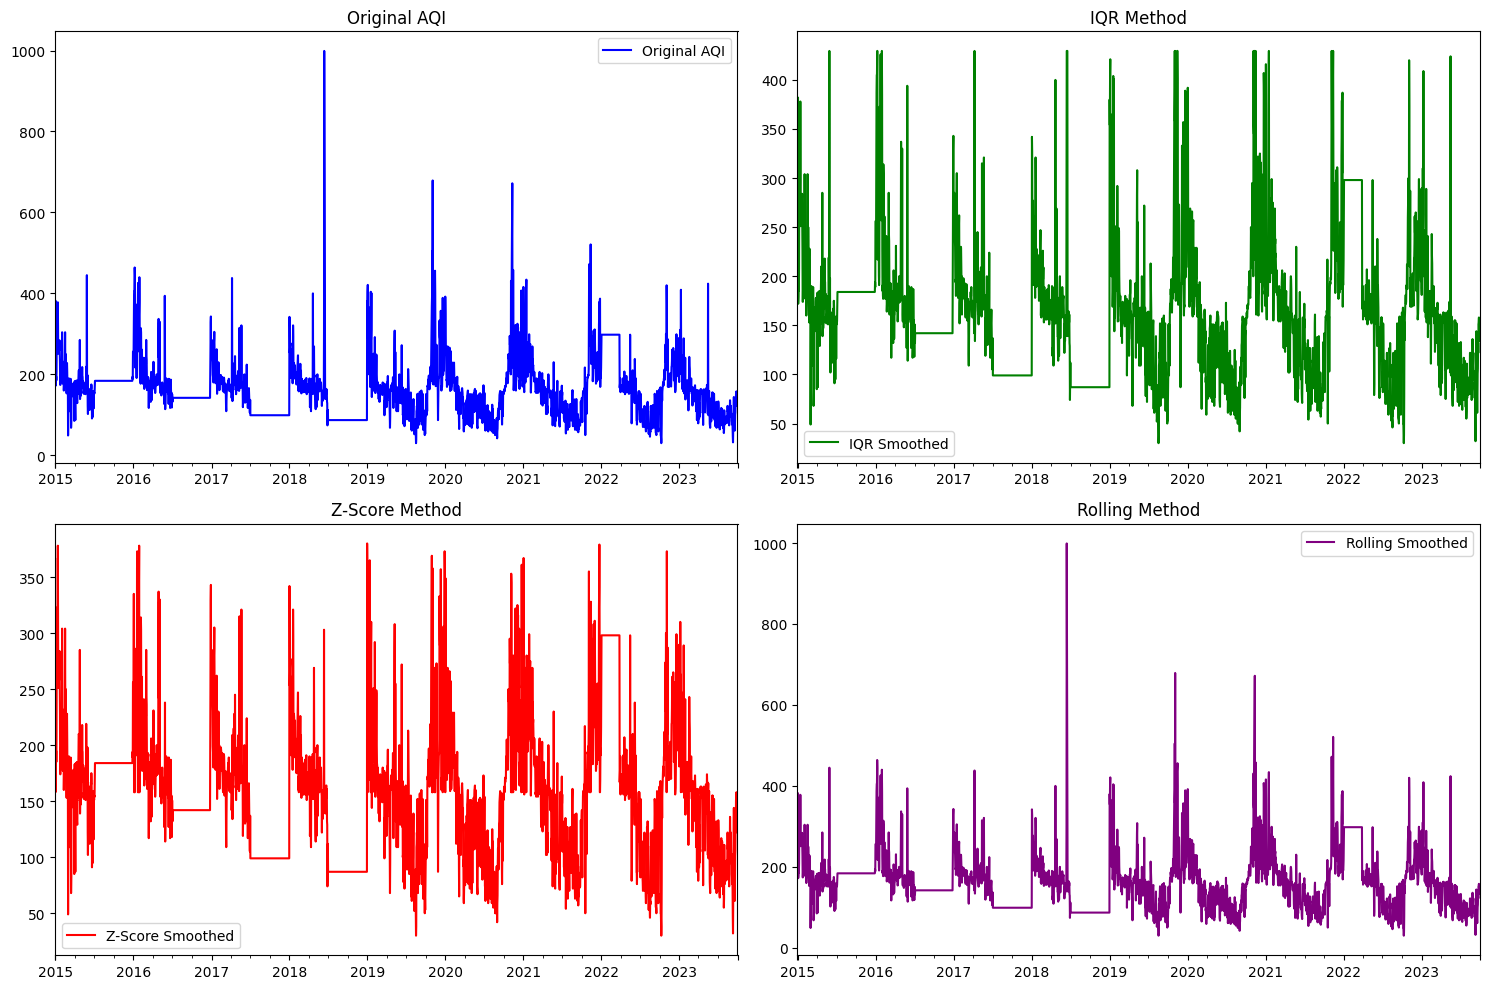

In [21]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot original AQI
new_data4['AQI'].plot(
    ax=axes[0, 0], 
    title='Original AQI', 
    color='blue', 
    label='Original AQI'
)
axes[0, 0].legend()

# Plot IQR Method smoothed AQI
new_data4['AQI_smoothed_iqr'].plot(
    ax=axes[0, 1], 
    title='IQR Method', 
    color='green', 
    label='IQR Smoothed'
)
axes[0, 1].legend()

# Plot Z-Score Method smoothed AQI
new_data4['AQI_smoothed_zscore'].plot(
    ax=axes[1, 0], 
    title='Z-Score Method', 
    color='red', 
    label='Z-Score Smoothed'
)
axes[1, 0].legend()

# Plot Rolling Method smoothed AQI
new_data4['AQI_smoothed_rolling'].plot(
    ax=axes[1, 1], 
    title='Rolling Method', 
    color='purple', 
    label='Rolling Smoothed'
)
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Save the figure
file_name = "aqi_comparison.png"
path = "/kaggle/working/"
plt.savefig(path + file_name)

# Show the plot
plt.show()


(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [22]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,177.000000


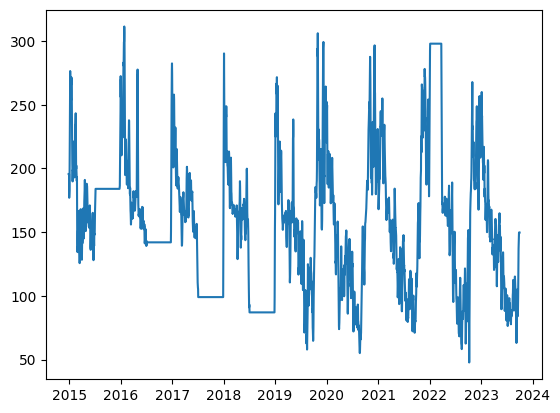

In [23]:
aqi_smooth = new_smooth['AQI_Smooth']
file_name = "aqi_smooth.png"
path = "/kaggle/working/"

# Create the plot
plt.plot(aqi_smooth)
plt.savefig(path + file_name)

# **2.1. Splitting & Preprocessing the Raw Data(Normal AQI)**

Normal AQI

In [24]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [25]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with Normal AQI***

In [26]:
data = new_data4.drop(['Country_City', 'Checks',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 
                       'AQI_smoothed_rolling'],axis=1)

In [27]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [28]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI'],
      dtype='object')
Index([], dtype='object')


In [29]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [30]:
# Standard Scalling the numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[ 
            ('scaler', StandardScaler())
        ]), ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed'])  
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **2.2. Model Training & Testing**

## **2.2.1. LinearRegression**

In [31]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [32]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.9675634154803487
The r2 Accuracy on the test dataset prediction is:  0.968703504370825

The RMSE  on the training dataset is:  13.335721085516212
The RMSE  on the testing dataset is:  11.928438053349607

The MAE  on the training dataset is:  8.782664440343714
The MAE  on the testing dataset is:  8.72687977710864

The MSE  on the training dataset is:  177.84145687068172
The MSE  on the testing dataset is:  142.28763439259896


## **2.2.2.  KNeighborsRegressor**

In [33]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [34]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9880364262171328
The R2 score on the test dataset prediction is:  0.9659555905220559

The RMSE  on the training dataset is:  8.098962925519118
The RMSE  on the testing dataset is:  12.441095585799507

The MAE  on the training dataset is:  4.665494333724111
The MAE  on the testing dataset is:  7.59921875

The MSE  on the training dataset is:  65.59320046893318
The MSE  on the testing dataset is:  154.780859375


## **2.2.3.  Random Forest Regressor**

In [35]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [36]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.998417014895535
The R2 score on the test dataset prediction is:  0.9955638715156327

The RMSE  on the training dataset is:  2.9460313148388204
The RMSE  on the testing dataset is:  4.490945473950893

The MAE  on the training dataset is:  0.3229542790152403
The MAE  on the testing dataset is:  0.7333750000000003

The MSE  on the training dataset is:  8.679100508010949
The MSE  on the testing dataset is:  20.168591250000006


## **2.2.4.  Decision Tree regressor**

In [37]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [38]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9915978212854688

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  6.180614856144977

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.984375

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  38.2


## **2.2.5.  Support Vector Machine regressor**

In [39]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [40]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.885316573048139
The R2 score on the test dataset prediction is:  0.9387441789037466

The RMSE on the training dataset is:  25.075481189251825
The RMSE on the testing dataset is:  16.688196580080987

The MAE on the training dataset is:  3.425123693377581
The MAE on the testing dataset is:  2.3894872727086267

The MSE  on the training dataset is:  628.7797568725221
The MSE  on the testing dataset is:  278.4959050954268


## **2.2.6.  XGBoost Regressor**

In [41]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [42]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999884261680223
The R2 score on the test dataset prediction is:  0.9884092057630378

The RMSE on the training dataset is:  0.25190543128934345
The RMSE on the testing dataset is:  7.259259509512052

The MAE on the training dataset is:  0.15732481443309002
The MAE on the testing dataset is:  1.3124947667121887

The MSE  on the training dataset is:  0.06345634631307014
The MSE  on the testing dataset is:  52.69684862644117


## **2.2.7.  Neural Network Regressor**

In [43]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9849455424674173
The R2 score on the test dataset prediction is:  0.9795535024296275

The RMSE on the training dataset is:  9.085137408204202
The RMSE on the testing dataset is:  9.641512900961477

The MAE on the training dataset is:  5.528725862770487
The MAE on the testing dataset is:  5.789952666048643

The MSE  on the training dataset is:  82.53972172595137
The MSE  on the testing dataset is:  92.95877101940658


# **3.1. Splitting & Preprocessing the Raw Data(Smoothed iqr)**

AQI Smoothed iqr

In [45]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [46]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [47]:
data = new_data4.drop(['Country_City', 'Checks', 'AQI', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],axis=1)

In [48]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_iqr
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [49]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_iqr'],
      dtype='object')
Index([], dtype='object')


In [50]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_iqr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [51]:
# Standard Scalling the numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[ 
            ('scaler', StandardScaler())
        ]), ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed'])  
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **3.2. Model Training & Testing**

## **3.2.1. LinearRegression**

In [52]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [53]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.971575605824904
The r2 Accuracy on the test dataset prediction is:  0.9804921207674033

The RMSE  on the training dataset is:  11.680317163751663
The RMSE  on the testing dataset is:  9.293047965360167

The MAE  on the training dataset is:  5.804792090705482
The MAE  on the testing dataset is:  5.575487911928219

The MSE  on the training dataset is:  136.4298090458317
The MSE  on the testing dataset is:  86.36074048648473


## **3.2.2.  KNeighborsRegressor**

In [54]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [55]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9881503124550901
The R2 score on the test dataset prediction is:  0.9683344557260709

The RMSE  on the training dataset is:  7.5415823305495
The RMSE  on the testing dataset is:  11.839861663835013

The MAE  on the training dataset is:  4.518268855021493
The MAE  on the testing dataset is:  7.401171875

The MSE  on the training dataset is:  56.87546404845643
The MSE  on the testing dataset is:  140.18232421875


## **3.2.3.  Random Forest Regressor**

In [56]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [57]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9993846214045392
The R2 score on the test dataset prediction is:  0.9983697143320134

The RMSE  on the training dataset is:  1.7186214195749465
The RMSE  on the testing dataset is:  2.686488617833695

The MAE  on the training dataset is:  0.25148690894880826
The MAE  on the testing dataset is:  0.5628906249999999

The MSE  on the training dataset is:  2.9536595838218043
The MSE  on the testing dataset is:  7.2172210937499965


## **3.2.4.  Decision Tree regressor**

In [58]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [59]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9977615000757655

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  3.147978021683125

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.66796875

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  9.909765625


## **3.2.5.  Support Vector Machine regressor**

In [60]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [61]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.9412475252092073
The R2 score on the test dataset prediction is:  0.9552176801212255

The RMSE on the training dataset is:  16.792761096304368
The RMSE on the testing dataset is:  14.080122829962145

The MAE on the training dataset is:  2.858560869334052
The MAE on the testing dataset is:  2.2001524641596695

The MSE  on the training dataset is:  281.9968252375535
The MSE  on the testing dataset is:  198.24985890682117


## **3.2.6.  XGBoost Regressor**

In [62]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [63]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999917243791947
The R2 score on the test dataset prediction is:  0.9973126151042563

The RMSE on the training dataset is:  0.19930092688666182
The RMSE on the testing dataset is:  3.4491976816390433

The MAE on the training dataset is:  0.12236696670371232
The MAE on the testing dataset is:  0.9527172446250916

The MSE  on the training dataset is:  0.039720859457882514
The MSE  on the testing dataset is:  11.896964647024152


## **3.2.7.  Neural Network Regressor**

In [64]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9799304484392967
The R2 score on the test dataset prediction is:  0.9878348793160197

The RMSE on the training dataset is:  9.814718804063775
The RMSE on the testing dataset is:  7.338568635458394

The MAE on the training dataset is:  4.477051689670137
The MAE on the testing dataset is:  4.225071175453303

The MSE  on the training dataset is:  96.32870520284305
The MSE  on the testing dataset is:  53.85458961733367


# **4.1. Splitting & Preprocessing the Raw Data(zscore)**

AQI smoothed zscore

In [66]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [67]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_zscore***

In [68]:
data = new_data4.drop(['Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_rolling'],axis=1)

In [69]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_zscore
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,158.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [70]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_zscore'],
      dtype='object')
Index([], dtype='object')


In [71]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_zscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [72]:
# Standard Scalling the numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[ 
            ('scaler', StandardScaler())
        ]), ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed'])  
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **4.2. Model Training & Testing**

## **4.2.1. LinearRegression**

In [73]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [74]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.820101251986455
The r2 Accuracy on the test dataset prediction is:  0.8109701883481275

The RMSE  on the training dataset is:  25.918017419593703
The RMSE  on the testing dataset is:  25.590582306071845

The MAE  on the training dataset is:  11.834615790056251
The MAE  on the testing dataset is:  11.513399614030623

The MSE  on the training dataset is:  671.7436269623626
The MSE  on the testing dataset is:  654.8779027638374


## **4.2.2.  KNeighborsRegressor**

In [75]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [76]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9658886199763066
The R2 score on the test dataset prediction is:  0.8982164082572395

The RMSE  on the training dataset is:  11.285929988674457
The RMSE  on the testing dataset is:  18.778197547288716

The MAE  on the training dataset is:  5.053145760062525
The MAE  on the testing dataset is:  8.92109375

The MSE  on the training dataset is:  127.37221570926143
The MSE  on the testing dataset is:  352.620703125


## **4.2.3.  Random Forest Regressor**

In [77]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [78]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9991980515343108
The R2 score on the test dataset prediction is:  0.9779666462049852

The RMSE  on the training dataset is:  1.7304574994733017
The RMSE  on the testing dataset is:  8.736858891000244

The MAE  on the training dataset is:  0.30908167252833124
The MAE  on the testing dataset is:  0.8783593750000005

The MSE  on the training dataset is:  2.9944831574833923
The MSE  on the testing dataset is:  76.33270328125002


## **4.2.4.  Decision Tree regressor**

In [79]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [80]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9704220530422009

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  10.122762098360308

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.9890625

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  102.4703125


## **4.2.5.  Support Vector Machine regressor**

In [81]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [82]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.7681003187224894
The R2 score on the test dataset prediction is:  0.7471182614546523

The RMSE on the training dataset is:  29.426443952841392
The RMSE on the testing dataset is:  29.598775980082568

The MAE on the training dataset is:  4.879696131220276
The MAE on the testing dataset is:  4.899310556212166

The MSE  on the training dataset is:  865.9156037097158
The MSE  on the testing dataset is:  876.0875395191127


## **4.2.6.  XGBoost Regressor**

In [83]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [84]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999929342008133
The R2 score on the test dataset prediction is:  0.9682686702850274

The RMSE on the training dataset is:  0.1624307883604559
The RMSE on the testing dataset is:  10.484775923423772

The MAE on the training dataset is:  0.09519905576299717
The MAE on the testing dataset is:  1.5003108382225037

The MSE  on the training dataset is:  0.026383761007399222
The MSE  on the testing dataset is:  109.93052616440681


## **4.2.7.  Neural Network Regressor**

In [85]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9313520054517337
The R2 score on the test dataset prediction is:  0.9328773101373946

The RMSE on the training dataset is:  16.01037979148571
The RMSE on the testing dataset is:  15.249292452339422

The MAE on the training dataset is:  6.121256481400981
The MAE on the testing dataset is:  6.032080652556028

The MSE  on the training dataset is:  256.33226106761407
The MSE  on the testing dataset is:  232.54092029697603


# **5.1. Splitting & Preprocessing the Raw Data(AQI_smoothed_rolling)**

AQI_smoothed_rolling

In [87]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


In [88]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_rolling***

In [89]:
data = new_data4.drop([ 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore'],axis=1)

In [90]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,172.0


In [91]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_rolling'],
      dtype='object')
Index([], dtype='object')


In [92]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_rolling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [93]:
# Standard Scalling the numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[ 
            ('scaler', StandardScaler())
        ]), ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed'])  
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **5.2. Model Training & Testing**

## **5.2.1. LinearRegression**

In [94]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [95]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.9675634154803487
The r2 Accuracy on the test dataset prediction is:  0.968703504370825

The RMSE  on the training dataset is:  13.335721085516212
The RMSE  on the testing dataset is:  11.928438053349607

The MAE  on the training dataset is:  8.782664440343714
The MAE  on the testing dataset is:  8.72687977710864

The MSE  on the training dataset is:  177.84145687068172
The MSE  on the testing dataset is:  142.28763439259896


## **5.2.2.  KNeighborsRegressor**

In [96]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [97]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9880364262171328
The R2 score on the test dataset prediction is:  0.9659555905220559

The RMSE  on the training dataset is:  8.098962925519118
The RMSE  on the testing dataset is:  12.441095585799507

The MAE  on the training dataset is:  4.665494333724111
The MAE  on the testing dataset is:  7.59921875

The MSE  on the training dataset is:  65.59320046893318
The MSE  on the testing dataset is:  154.780859375


## **5.2.3.  Random Forest Regressor**

In [98]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [99]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9980759578205076
The R2 score on the test dataset prediction is:  0.9962087847844905

The RMSE  on the training dataset is:  3.2479268465149618
The RMSE  on the testing dataset is:  4.1516902431419425

The MAE  on the training dataset is:  0.32180148495506056
The MAE  on the testing dataset is:  0.67778125

The MSE  on the training dataset is:  10.549028800312623
The MSE  on the testing dataset is:  17.236531875000004


## **5.2.4.  Decision Tree regressor**

In [100]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [101]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9857443401063992

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  8.050621094052309

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  1.078125

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  64.8125


## **5.2.5.  Support Vector Machine regressor**

In [102]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [103]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.885316573048139
The R2 score on the test dataset prediction is:  0.9387441789037466

The RMSE on the training dataset is:  25.075481189251825
The RMSE on the testing dataset is:  16.688196580080987

The MAE on the training dataset is:  3.425123693377581
The MAE on the testing dataset is:  2.3894872727086267

The MSE  on the training dataset is:  628.7797568725221
The MSE  on the testing dataset is:  278.4959050954268


## **5.2.6.  XGBoost Regressor**

In [104]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [105]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999884261680223
The R2 score on the test dataset prediction is:  0.9884092057630378

The RMSE on the training dataset is:  0.25190543128934345
The RMSE on the testing dataset is:  7.259259509512052

The MAE on the training dataset is:  0.15732481443309002
The MAE on the testing dataset is:  1.3124947667121887

The MSE  on the training dataset is:  0.06345634631307014
The MSE  on the testing dataset is:  52.69684862644117


## **5.2.7.  Neural Network Regressor**

In [106]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9942082730657311
The R2 score on the test dataset prediction is:  0.991863163586343

The RMSE on the training dataset is:  5.63511759716274
The RMSE on the testing dataset is:  6.082239488351692

The MAE on the training dataset is:  2.890702860352827
The MAE on the testing dataset is:  2.985223014385076

The MSE  on the training dataset is:  31.754550333853167
The MSE  on the testing dataset is:  36.993637193664654


# **6.1. Splitting & Preprocessing the Raw Data**

(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [108]:
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,177.000000


In [109]:
new_smooth.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'AQI_Smooth'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [110]:
data = new_smooth.drop(['Country_City'],axis=1)

In [111]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,177.000000


In [112]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_Smooth'],
      dtype='object')
Index([], dtype='object')


In [113]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_Smooth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2559, 10) (2559,) (640, 10) (640,)


In [114]:
# Standard Scalling the numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[ 
            ('scaler', StandardScaler())
        ]), ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed'])  
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **6.2. Model Training & Testing**

## **6.2.1. LinearRegression**

In [115]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [116]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.9957518243926221
The r2 Accuracy on the test dataset prediction is:  0.9967443701733852

The RMSE  on the training dataset is:  3.559783538275859
The RMSE  on the testing dataset is:  2.980390727527673

The MAE  on the training dataset is:  1.4027802339569377
The MAE  on the testing dataset is:  1.3042642877255504

The MSE  on the training dataset is:  12.672058839379794
The MSE  on the testing dataset is:  8.882728888732933


## **6.2.2.  KNeighborsRegressor**

In [117]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [118]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9943431422885666
The R2 score on the test dataset prediction is:  0.982106681317648

The RMSE  on the training dataset is:  4.107806590990826
The RMSE  on the testing dataset is:  6.987167309494366

The MAE  on the training dataset is:  2.590152982272786
The MAE  on the testing dataset is:  4.337054976610323

The MSE  on the training dataset is:  16.874074988987672
The MSE  on the testing dataset is:  48.82050701086673


## **6.2.3.  Random Forest Regressor**

In [119]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [120]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9998888146303572
The R2 score on the test dataset prediction is:  0.9990500839772718

The RMSE  on the training dataset is:  0.5758988112158119
The RMSE  on the testing dataset is:  1.6098977775884125

The MAE  on the training dataset is:  0.10570531614173005
The MAE  on the testing dataset is:  0.30238588076481826

The MSE  on the training dataset is:  0.3316594407597854
The MSE  on the testing dataset is:  2.5917708542841096


## **6.2.4.  Decision Tree regressor**

In [121]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [122]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9983408392640943

The RMSE  on the training dataset is:  1.5891322657901308e-15
The RMSE  on the testing dataset is:  2.1276487130124897

The MAE  on the training dataset is:  8.885254999735525e-17
The MAE  on the testing dataset is:  0.35371180700473015

The MSE  on the training dataset is:  2.525341358175275e-30
The MSE  on the testing dataset is:  4.526889045983705


## **6.2.5.  Support Vector Machine regressor**

In [123]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [124]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.9948054049567016
The R2 score on the test dataset prediction is:  0.9959206837695272

The RMSE on the training dataset is:  3.9363908017937184
The RMSE on the testing dataset is:  3.3361792811734903

The MAE on the training dataset is:  0.4688471754320487
The MAE on the testing dataset is:  0.44530295551363086

The MSE  on the training dataset is:  15.495172544446191
The MSE  on the testing dataset is:  11.130092196131267


## **6.2.6.  XGBoost Regressor**

In [125]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [126]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999948866321279
The R2 score on the test dataset prediction is:  0.9993201126072465

The RMSE on the training dataset is:  0.12350253703384058
The RMSE on the testing dataset is:  1.3619908447692324

The MAE on the training dataset is:  0.08059062257039981
The MAE on the testing dataset is:  0.5011409600575767

The MSE  on the training dataset is:  0.015252876653795162
The MSE  on the testing dataset is:  1.855019061235207


## **6.2.7.  Neural Network Regressor**

In [127]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [128]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9997171056598767
The R2 score on the test dataset prediction is:  0.9995257713168422

The RMSE on the training dataset is:  0.9186170232262793
The RMSE on the testing dataset is:  1.1374952803090779

The MAE on the training dataset is:  0.32266476173672554
The MAE on the testing dataset is:  0.3775959146333941

The MSE  on the training dataset is:  0.8438572353611106
The MSE  on the testing dataset is:  1.2938955127254277
